# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [181]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [182]:
cats = pd.read_csv('../data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

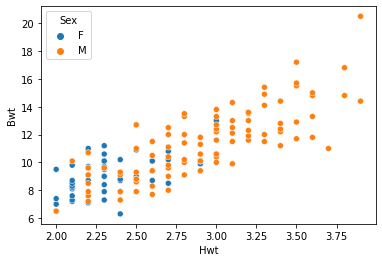

In [183]:
sns.scatterplot(x='Hwt', y='Bwt', data=cats, hue="Sex")

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

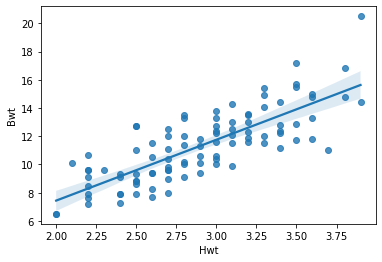

In [184]:
m = cats[cats["Sex"]=="M"]
sns.regplot(x=m.Hwt,y=m.Bwt)

In [185]:
mx = m.Hwt.mean()
my = m.Bwt.mean()
xx = m.Hwt - mx
yy = m.Bwt - my
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

# Regression line equation
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

ŷ = -1.18 + 4.31 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [186]:
cor = np.corrcoef(m.Hwt, m.Bwt)
print(f'Correlation coefficient: {cor[0,1]}')
det = cor**2
print(f'determination coefficient: {det[0,1]}')

Correlation coefficient: 0.7930443171812304
determination coefficient: 0.628919289013444


5. Interpret the results from the previous steps.

In [187]:
#there is a strong correlation between the values of Hwt and Bwt


### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


2. Draw a scatter plot of both variables for each gender.


3. Calculate and draw the regression line.


4. Calculate the correlation coefficient and the coefficient of determination.


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [188]:
landbouw = pd.read_csv('../data/Landbouw%20Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [189]:
landbouw.info()
landbouw.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   jaar                                     41 non-null     int64 
 1   aantal land en tuinbouwbedrijven         41 non-null     int64 
 2   gemiddelde oppervlakte per bedrijf (ha)  41 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [190]:
#Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].apply(lambda x: float(x.split()[0].replace(',', '.')))

landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].astype(float)

4. Draw a scatter plot of the number of farms versus the year.


<AxesSubplot:xlabel='jaar', ylabel='aantal land en tuinbouwbedrijven'>

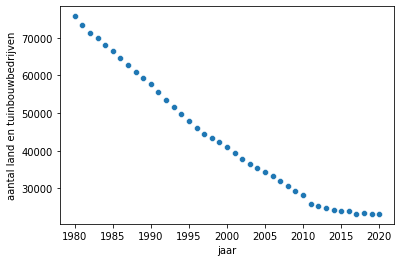

In [191]:
sns.scatterplot(x='jaar', y='aantal land en tuinbouwbedrijven', data=landbouw)

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [192]:
cor = np.corrcoef(landbouw['jaar'], landbouw['aantal land en tuinbouwbedrijven'])[0,1]

6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [193]:
cor **2 

0.9724062954910041

7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

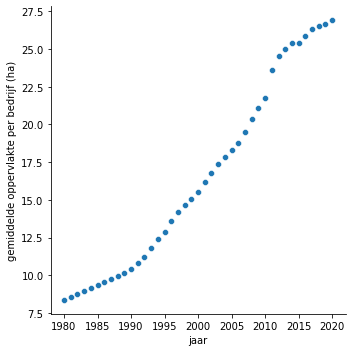

In [194]:
sns.relplot(x='jaar', y='gemiddelde oppervlakte per bedrijf (ha)', data=landbouw)

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [195]:
from matplotlib.collections import LineCollection
import math
xmin = math.floor(landbouw["jaar"].min() / 10) * 10
xmax = math.ceil(landbouw["jaar"].max() / 10) * 10

ymin = math.floor(landbouw["gemiddelde oppervlakte per bedrijf (ha)"].min() / 10) * 10
ymax = math.ceil(landbouw["gemiddelde oppervlakte per bedrijf (ha)"].max() / 10) * 10

In [196]:
mx = landbouw.jaar.mean()
my = landbouw["gemiddelde oppervlakte per bedrijf (ha)"].mean()
xx = landbouw.jaar - mx
yy = landbouw["gemiddelde oppervlakte per bedrijf (ha)"]- my
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

<AxesSubplot:xlabel='jaar', ylabel='gemiddelde oppervlakte per bedrijf (ha)'>

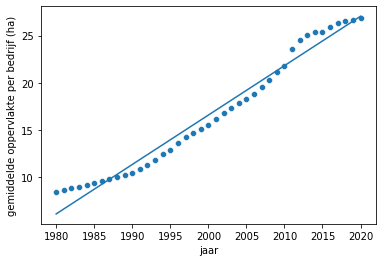

In [197]:
x_values = [xmin, xmax]
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

sns.lineplot(x=x_values, y=y_values)
sns.scatterplot(x=landbouw.jaar, y=landbouw["gemiddelde oppervlakte per bedrijf (ha)"])

In [198]:
from sklearn.linear_model import LinearRegression

landbouw_x = landbouw['jaar'].values.reshape(-1,1)
landbouw_y = landbouw["gemiddelde oppervlakte per bedrijf (ha)"]

weight_model = LinearRegression().fit(landbouw_x, landbouw_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = -1031.90 + 0.52 x


In [199]:
print(f'Gemiddelde oppervalkte in 2035 = {weight_model.intercept_ + weight_model.coef_[0] * 2035}')

Gemiddelde oppervalkte in 2035 = 34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

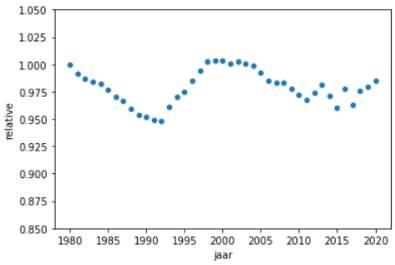


In [200]:
landbouw['total_oppervlakte'] = landbouw['aantal land en tuinbouwbedrijven'] * landbouw['gemiddelde oppervlakte per bedrijf (ha)']
landbouw.head()
help = landbouw.iloc[0,3]
landbouw["relative"] = landbouw['total_oppervlakte']/help
help

634416.28

(0.85, 1.05)

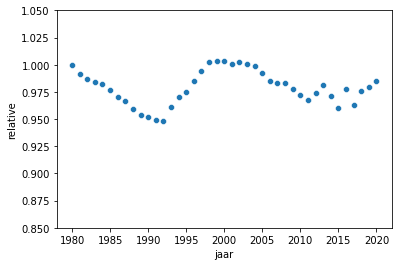

In [201]:
sns.scatterplot(x='jaar', y='relative', data=landbouw)
plt.ylim(0.85,1.05)

## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [202]:
movies = pd.read_csv('../data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [203]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [204]:
for col in cols_with_dollars:
    movies[col] = movies[col].str.replace('$', '').str.replace(' ', '').astype(float)/1000000


C:\Users\szymo\AppData\Local\Temp\ipykernel_12104\2948894442.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[col] = movies[col].str.replace('$', '').str.replace(' ', '').astype(float)/1000000


In [205]:
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

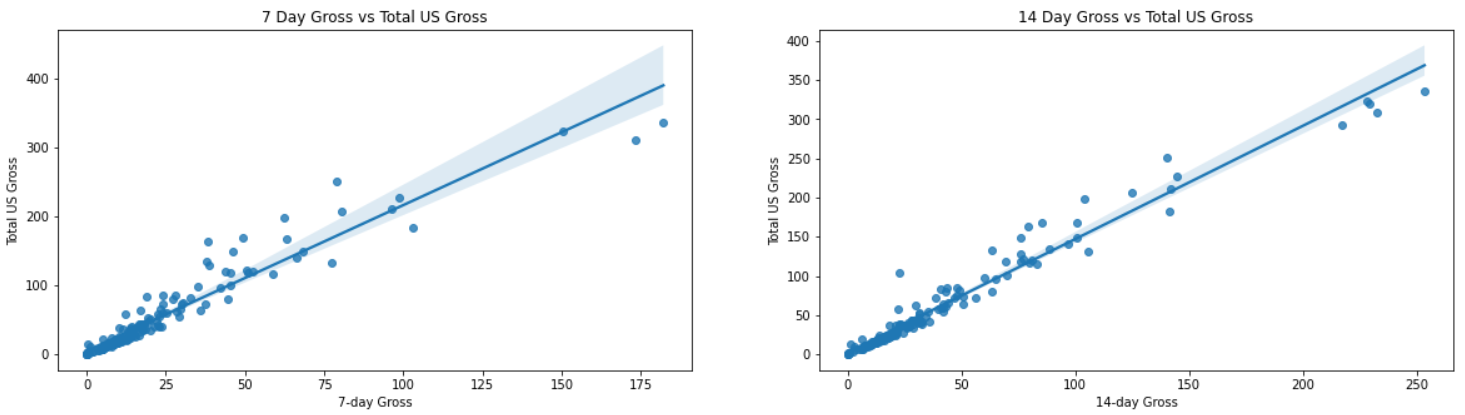

In [206]:
extra_7_days_gross = movies.dropna(subset=['7-day Gross'])
extra_14_days_gross = movies.dropna(subset=['14-day Gross'])

Text(0.5, 1.0, '14 Day gross vs year vs total US Gross')

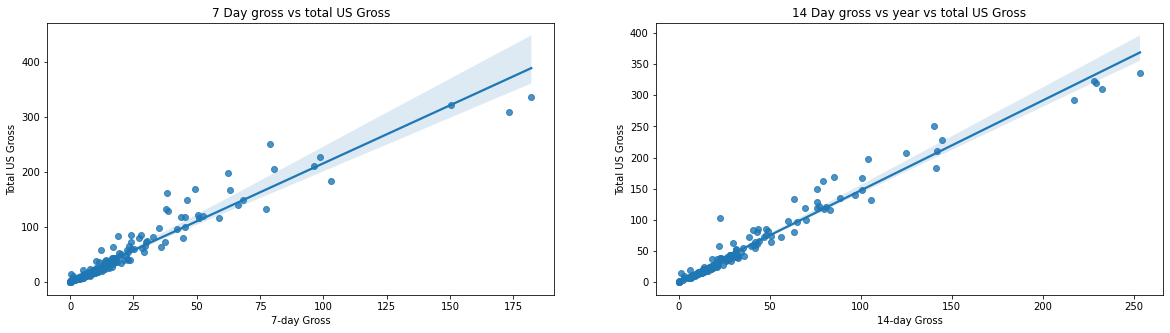

In [207]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
sns.regplot(x='7-day Gross', y='Total US Gross', data=movies, ax=axs[0])
axs[0].set_title('7 Day gross vs total US Gross')
sns.regplot(x='14-day Gross', y='Total US Gross', data=movies, ax=axs[1])
axs[1].set_title('14 Day gross vs year vs total US Gross')

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [208]:
cor = np.corrcoef(extra_7_days_gross['7-day Gross'], extra_7_days_gross['Total US Gross'])[0,1]
cor

0.9594075444143062

In [209]:
cor**2

0.920462836279089

In [210]:
cor = np.corrcoef(extra_14_days_gross['14-day Gross'], extra_14_days_gross['Total US Gross'])[0,1]
cor

0.9813238689021968

In [211]:
cor **2

0.9629965356771759

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [212]:
from sklearn.linear_model import LinearRegression

movies_x = extra_7_days_gross['7-day Gross'].values.reshape(-1,1)
movies_y = extra_7_days_gross["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.8f} + {weight_model.coef_[0]:.8f} x")

Regression line: ŷ = 4.59092123 + 2.11346476 x


In [213]:
from sklearn.linear_model import LinearRegression

movies_x = extra_14_days_gross['14-day Gross'].values.reshape(-1,1)
movies_y = extra_14_days_gross["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.8f} + {weight_model.coef_[0]:.8f} x")

Regression line: ŷ = 2.44900289 + 1.44645307 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

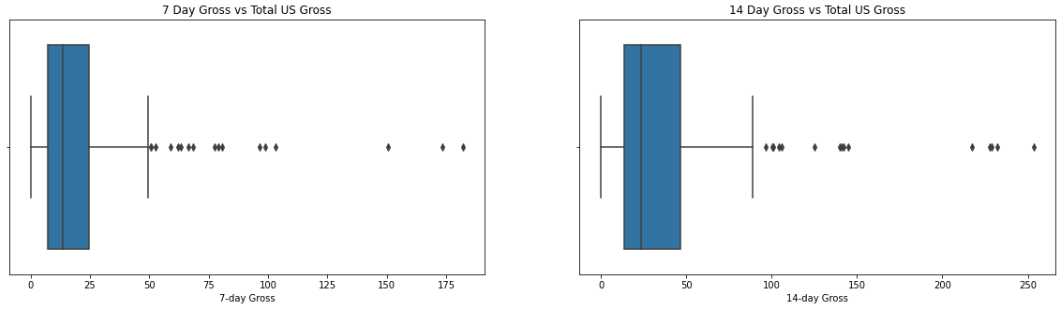

Text(0.5, 1.0, '14 Day gross vs year vs total US Gross')

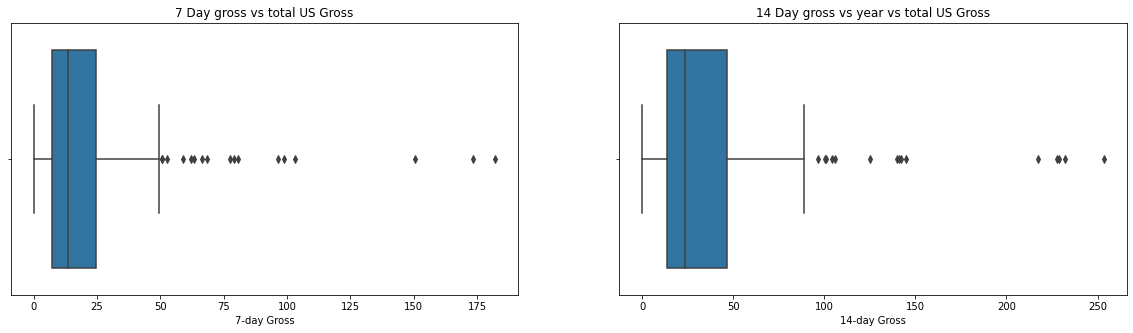

In [214]:
fig,axs = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(x='7-day Gross', data=extra_7_days_gross, ax=axs[0])
axs[0].set_title('7 Day gross vs total US Gross')
sns.boxplot(x='14-day Gross', data=extra_14_days_gross, ax=axs[1])
axs[1].set_title('14 Day gross vs year vs total US Gross')


* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [215]:
extra_7_days_gross['7-day Gross'].describe()

count    156.000000
mean      23.015999
std       28.849397
min        0.006795
25%        7.185955
50%       13.629257
75%       24.462228
max      182.070572
Name: 7-day Gross, dtype: float64

In [216]:
#calculate the upper limit value for movies['7-day Gross']
q1 = extra_7_days_gross['7-day Gross'].quantile(0.25)
q3 = extra_7_days_gross['7-day Gross'].quantile(0.75)
limit_7_days_gross = q3 + 1.5 *(q3 - q1)
print(limit_7_days_gross)

50.376637875


In [217]:
q1 = extra_14_days_gross['14-day Gross'].quantile(0.25)
q3 = extra_14_days_gross['14-day Gross'].quantile(0.75)
limit_14_days_gross = q3 + 1.5 *(q3 - q1)
print(limit_14_days_gross)


96.2906745


In [218]:
moviesout = movies[(movies["7-day Gross"] > 50) | (movies["14-day Gross"] > 90)]
moviesout

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50.705336,79.668309,117.144465,194.600000,47.716836,85.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
31,32.0,I Now Pronounce You Chuck and Larry,Universal,Comedy,52.547115,81.169105,119.725280,65.983182,69.258990,85.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
37,38.0,The Transformers,Paramount Pictures,Action,NaN,228.950080,319.246193,389.026399,290.541120,151.0


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

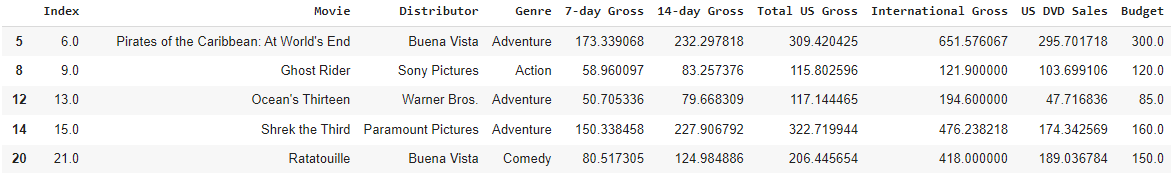

* 6.4 Remove the outliers out of the dataset.

Text(0.5, 1.0, '14 Day gross vs year vs total US Gross')

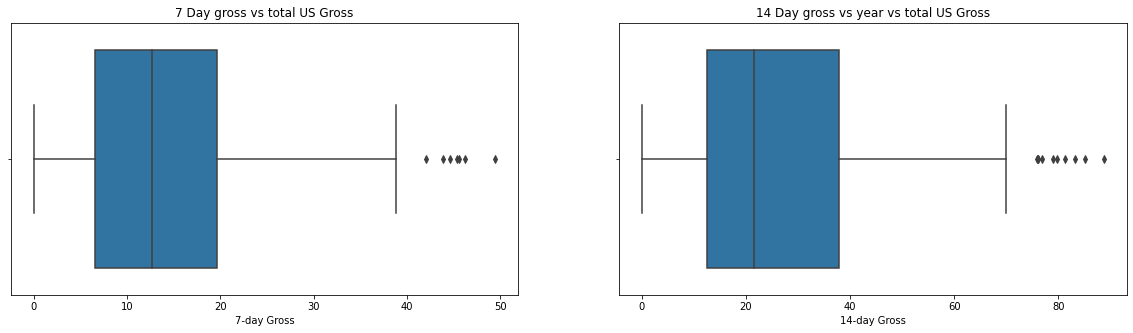

In [219]:
extra_7_days_gross = extra_7_days_gross[(extra_7_days_gross["7-day Gross"] < 50)]
extra_14_days_gross = extra_14_days_gross[(extra_14_days_gross["14-day Gross"] < 90)]
fig,axs = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(x='7-day Gross', data=extra_7_days_gross, ax=axs[0])
axs[0].set_title('7 Day gross vs total US Gross')
sns.boxplot(x='14-day Gross', data=extra_14_days_gross, ax=axs[1])
axs[1].set_title('14 Day gross vs year vs total US Gross')


* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [220]:
cor = np.corrcoef(extra_7_days_gross['7-day Gross'], extra_7_days_gross['Total US Gross'])[0][1]
print(f"R = {cor}")
print(f"R² = {cor ** 2}")

R = 0.9324792650689286
R² = 0.8695175797834893


In [221]:
cor = np.corrcoef(extra_14_days_gross['14-day Gross'], extra_14_days_gross['Total US Gross'])[0][1]
print(f"R = {cor}")
print(f"R² = {cor ** 2}")

R = 0.9584258717658027
R² = 0.9185801516700389


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [222]:
movies7_x = extra_7_days_gross['7-day Gross'].values.reshape(-1,1)
movies7_y = extra_7_days_gross['Total US Gross']
#get the linear regression model
weight_model = LinearRegression().fit(movies7_x, movies7_y)
#print the regression line
print(f"Regression line: ŷ = {weight_model.intercept_:.8f} + {weight_model.coef_[0]:.8f} * x")


Regression line: ŷ = -5.07394598 + 2.74568097 * x


In [223]:
movies14_x = extra_14_days_gross['14-day Gross'].values.reshape(-1,1)
movies14_y = extra_14_days_gross['Total US Gross']
#get the linear regression model
weight_model = LinearRegression().fit(movies14_x, movies14_y)
#print the regression line
print(f"Regression line: ŷ = {weight_model.intercept_:.8f} + {weight_model.coef_[0]:.8f} * x")

Regression line: ŷ = -3.22735495 + 1.65298695 * x
